## Etapa 1: Importação das bibliotecas

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__

'1.13.1+cu116'

In [2]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [3]:
transform = transforms.ToTensor()
train = datasets.MNIST(root = '.', train = True, download = True, 
                       transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



## Etapa 3: Construção do gerador

In [4]:
class gerador(nn.Module):
  def __init__(self):
    super().__init__()

    # 100 -> 32 -> 64 -> 128 -> 784
    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense3 = nn.Linear(128, 784)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X))
    X = X.view(X.shape[0], 28, 28)
    return X

## Etapa 4: Construção do discriminador

In [5]:
class discriminador(nn.Module):
  def __init__(self):
    super().__init__()

    # 784 -> 128 -> 64 -> 32 -> 1
    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64, 32)
    self.dense3 = nn.Linear(32, 1)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 28 * 28)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)
    return X

## Etapa 5: Criação dos objetos

In [6]:
G = gerador()
D = discriminador()

In [7]:
G_optimizer = optim.Adam(G.parameters(), lr = 0.002)
D_optimizer = optim.Adam(D.parameters(), lr = 0.002)

In [8]:
criterion = nn.BCEWithLogitsLoss()

In [9]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [10]:
G.to(device)

gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [11]:
D.to(device)

discriminador(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Etapa 6: Treinamento do modelo

ÉPOCA 001 finalizada: custo discriminador 0.827787 - custo gerador 3.631241      


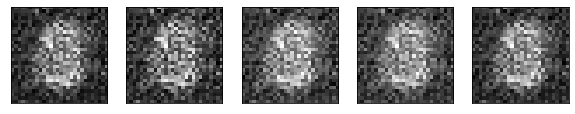

ÉPOCA 002 finalizada: custo discriminador 0.960892 - custo gerador 3.595443      


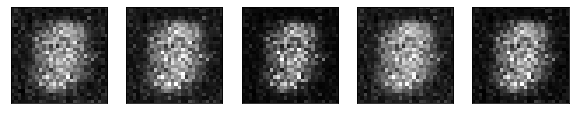

ÉPOCA 003 finalizada: custo discriminador 1.026672 - custo gerador 2.778271      


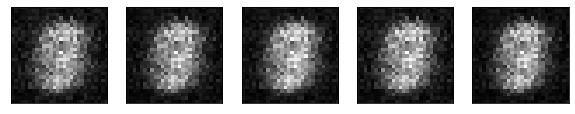

ÉPOCA 004 finalizada: custo discriminador 1.146294 - custo gerador 2.130079      


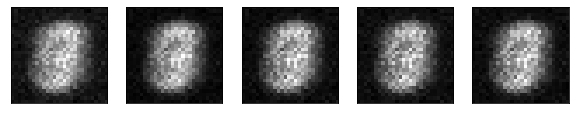

ÉPOCA 005 finalizada: custo discriminador 1.051810 - custo gerador 2.141726      


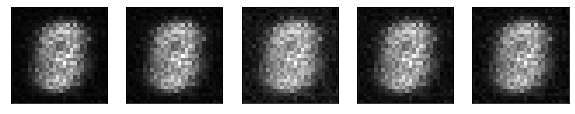

ÉPOCA 006 finalizada: custo discriminador 1.119605 - custo gerador 1.826213      


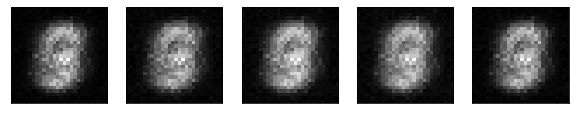

ÉPOCA 007 finalizada: custo discriminador 1.067225 - custo gerador 1.737153      


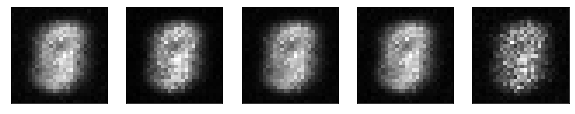

ÉPOCA 008 finalizada: custo discriminador 0.919866 - custo gerador 2.207836      


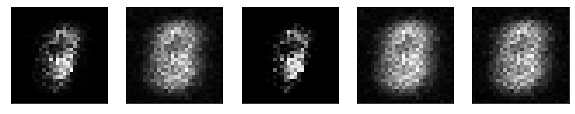

ÉPOCA 009 finalizada: custo discriminador 1.042111 - custo gerador 1.703369      


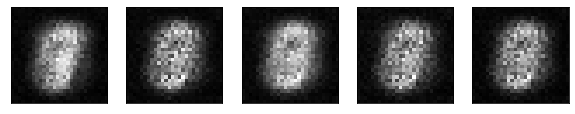

ÉPOCA 010 finalizada: custo discriminador 0.921450 - custo gerador 1.946445      


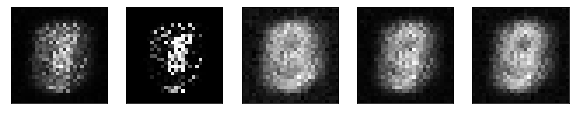

ÉPOCA 011 finalizada: custo discriminador 0.912850 - custo gerador 2.256109      


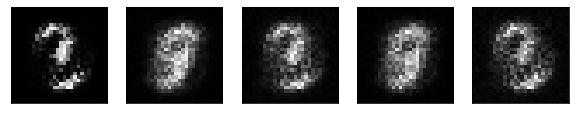

ÉPOCA 012 finalizada: custo discriminador 0.960847 - custo gerador 2.163291      


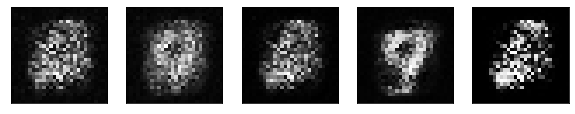

ÉPOCA 013 finalizada: custo discriminador 1.043168 - custo gerador 1.864115      


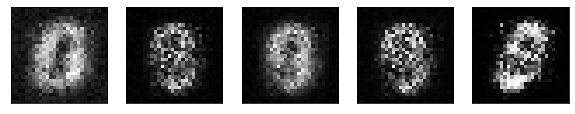

ÉPOCA 014 finalizada: custo discriminador 0.979579 - custo gerador 2.134167      


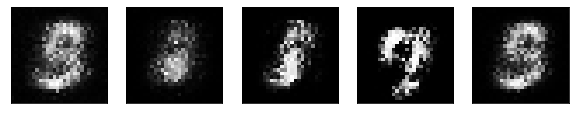

ÉPOCA 015 finalizada: custo discriminador 1.001864 - custo gerador 1.945022      


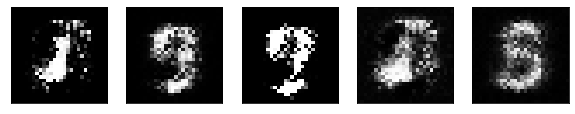

ÉPOCA 016 finalizada: custo discriminador 1.012566 - custo gerador 1.987387      


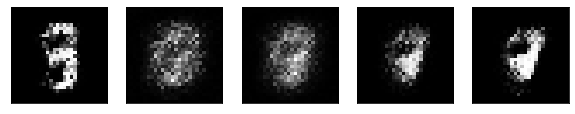

ÉPOCA 017 finalizada: custo discriminador 1.031585 - custo gerador 1.904586      


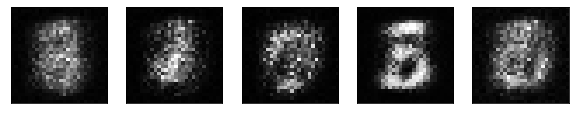

ÉPOCA 018 finalizada: custo discriminador 1.101213 - custo gerador 1.659035      


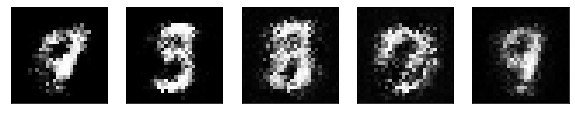

ÉPOCA 019 finalizada: custo discriminador 1.066337 - custo gerador 1.809422      


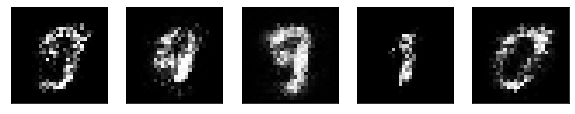

ÉPOCA 020 finalizada: custo discriminador 1.049773 - custo gerador 1.903815      


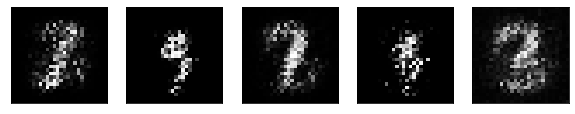

ÉPOCA 021 finalizada: custo discriminador 1.085109 - custo gerador 1.878915      


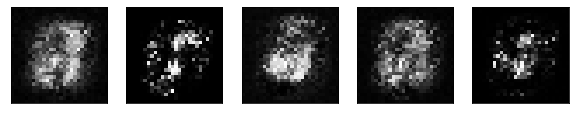

ÉPOCA 022 finalizada: custo discriminador 1.038106 - custo gerador 1.872268      


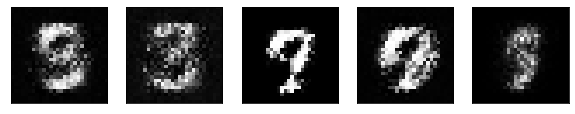

ÉPOCA 023 finalizada: custo discriminador 1.032687 - custo gerador 1.804026      


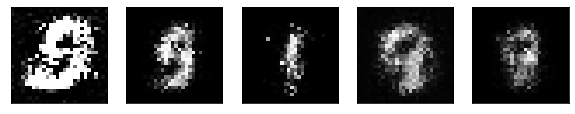

ÉPOCA 024 finalizada: custo discriminador 1.095599 - custo gerador 1.748210      


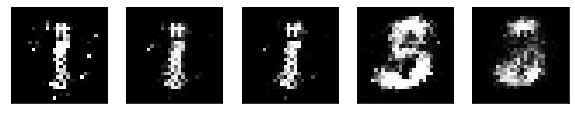

ÉPOCA 025 finalizada: custo discriminador 1.151408 - custo gerador 1.530236      


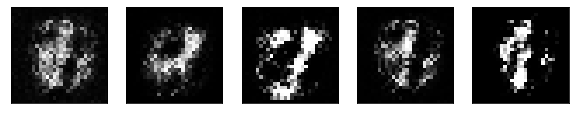

ÉPOCA 026 finalizada: custo discriminador 1.141808 - custo gerador 1.457117      


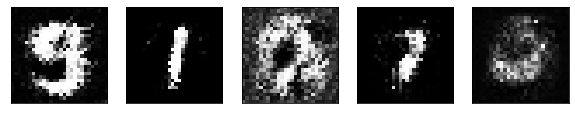

ÉPOCA 027 finalizada: custo discriminador 1.133772 - custo gerador 1.564318      


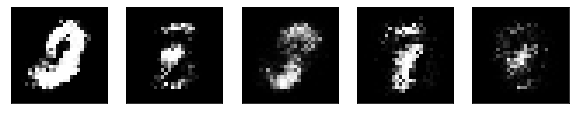

ÉPOCA 028 finalizada: custo discriminador 1.158475 - custo gerador 1.478634      


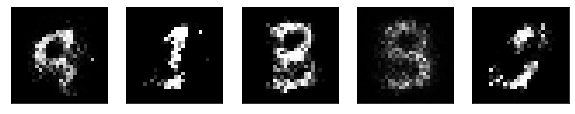

ÉPOCA 029 finalizada: custo discriminador 1.143518 - custo gerador 1.455305      


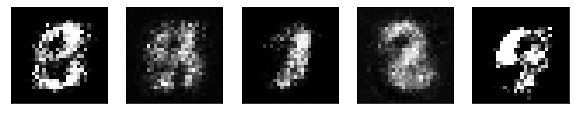

ÉPOCA 030 finalizada: custo discriminador 1.146172 - custo gerador 1.436717      


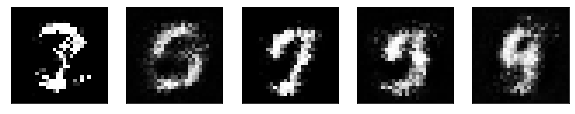

ÉPOCA 031 finalizada: custo discriminador 1.146849 - custo gerador 1.468957      


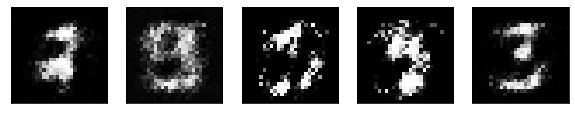

ÉPOCA 032 finalizada: custo discriminador 1.202406 - custo gerador 1.270774      


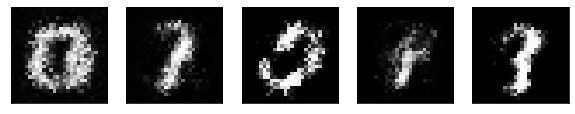

ÉPOCA 033 finalizada: custo discriminador 1.200502 - custo gerador 1.258793      


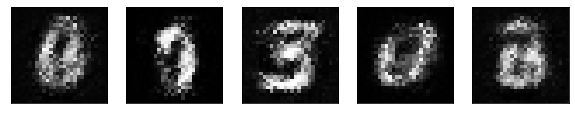

ÉPOCA 034 finalizada: custo discriminador 1.206025 - custo gerador 1.248266      


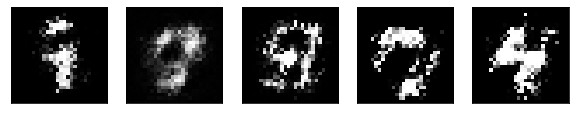

ÉPOCA 035 finalizada: custo discriminador 1.223694 - custo gerador 1.167420      


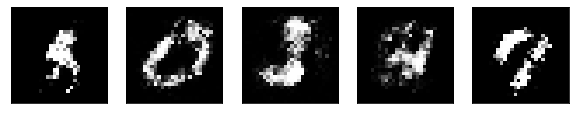

ÉPOCA 036 finalizada: custo discriminador 1.187761 - custo gerador 1.276985      


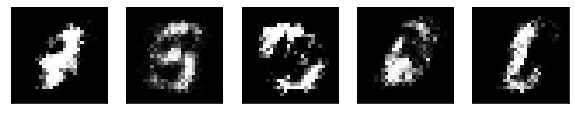

ÉPOCA 037 finalizada: custo discriminador 1.243381 - custo gerador 1.132566      


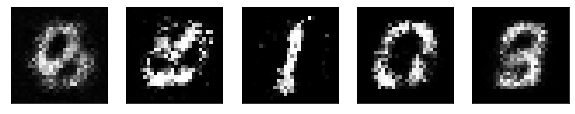

ÉPOCA 038 finalizada: custo discriminador 1.228643 - custo gerador 1.170168      


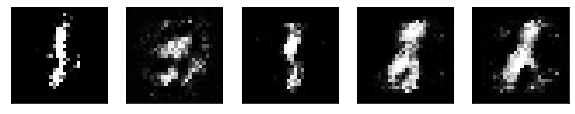

ÉPOCA 039 finalizada: custo discriminador 1.234536 - custo gerador 1.145072      


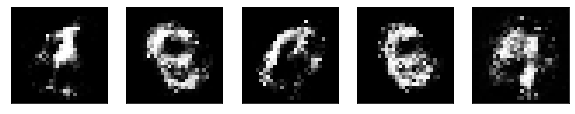

ÉPOCA 040 finalizada: custo discriminador 1.225699 - custo gerador 1.202371      


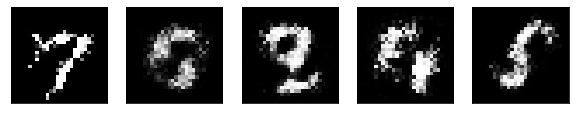

ÉPOCA 041 finalizada: custo discriminador 1.239620 - custo gerador 1.146491      


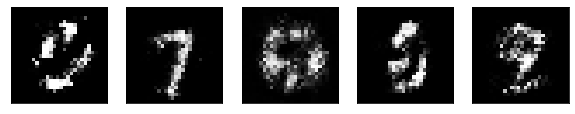

ÉPOCA 042 finalizada: custo discriminador 1.251409 - custo gerador 1.107512      


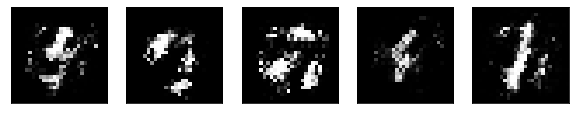

ÉPOCA 043 finalizada: custo discriminador 1.237723 - custo gerador 1.137644      


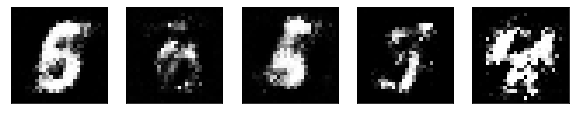

ÉPOCA 044 finalizada: custo discriminador 1.230908 - custo gerador 1.141140      


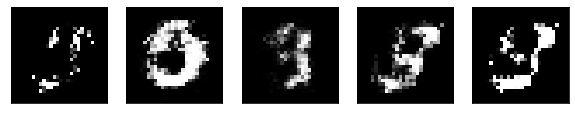

ÉPOCA 045 finalizada: custo discriminador 1.216469 - custo gerador 1.189864      


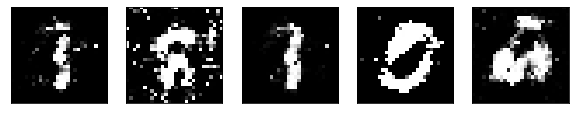

ÉPOCA 046 finalizada: custo discriminador 1.231699 - custo gerador 1.168042      


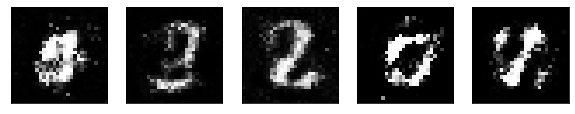

ÉPOCA 047 finalizada: custo discriminador 1.230250 - custo gerador 1.161972      


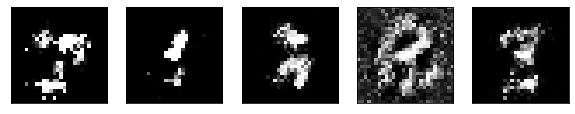

ÉPOCA 048 finalizada: custo discriminador 1.228056 - custo gerador 1.184614      


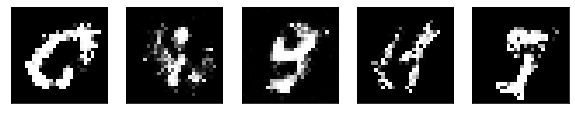

ÉPOCA 049 finalizada: custo discriminador 1.212559 - custo gerador 1.223681      


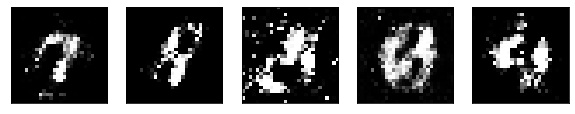

ÉPOCA 050 finalizada: custo discriminador 1.221317 - custo gerador 1.192630      


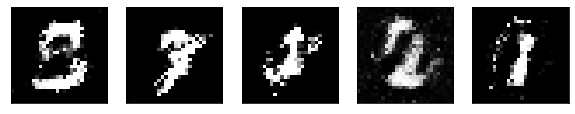

ÉPOCA 051 finalizada: custo discriminador 1.214384 - custo gerador 1.183188      


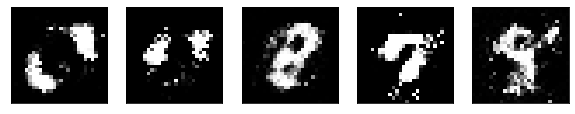

ÉPOCA 052 finalizada: custo discriminador 1.220553 - custo gerador 1.198220      


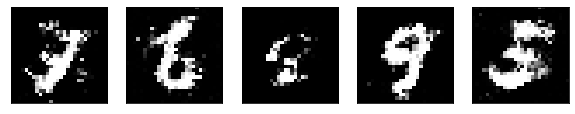

ÉPOCA 053 finalizada: custo discriminador 1.234939 - custo gerador 1.187289      


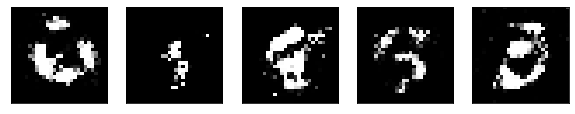

ÉPOCA 054 finalizada: custo discriminador 1.233743 - custo gerador 1.150923      


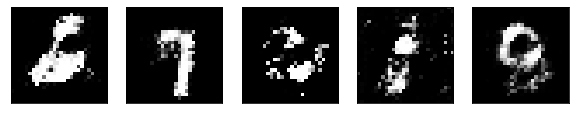

ÉPOCA 055 finalizada: custo discriminador 1.243470 - custo gerador 1.122099      


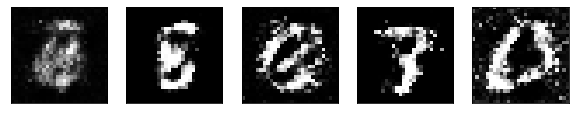

ÉPOCA 056 finalizada: custo discriminador 1.263106 - custo gerador 1.105977      


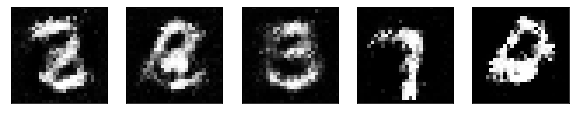

ÉPOCA 057 finalizada: custo discriminador 1.249100 - custo gerador 1.112981      


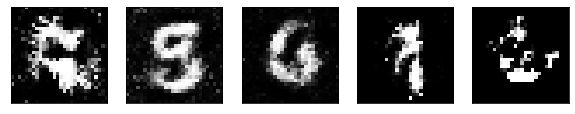

ÉPOCA 058 finalizada: custo discriminador 1.255716 - custo gerador 1.123473      


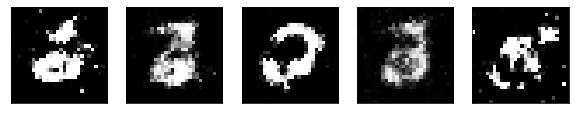

ÉPOCA 059 finalizada: custo discriminador 1.241007 - custo gerador 1.140634      


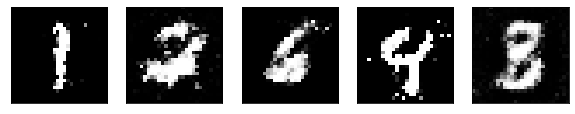

ÉPOCA 060 finalizada: custo discriminador 1.241809 - custo gerador 1.166435      


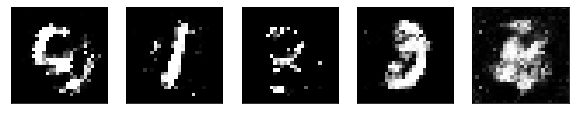

ÉPOCA 061 finalizada: custo discriminador 1.240019 - custo gerador 1.123845      


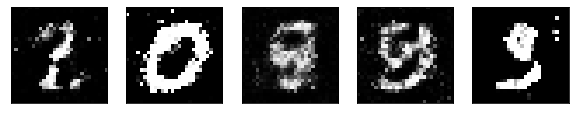

ÉPOCA 062 finalizada: custo discriminador 1.252710 - custo gerador 1.129129      


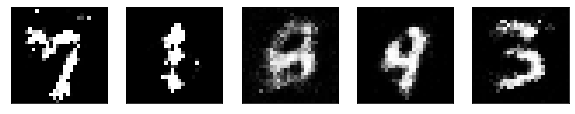

ÉPOCA 063 finalizada: custo discriminador 1.238233 - custo gerador 1.159297      


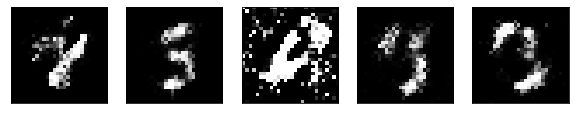

ÉPOCA 064 finalizada: custo discriminador 1.237534 - custo gerador 1.160800      


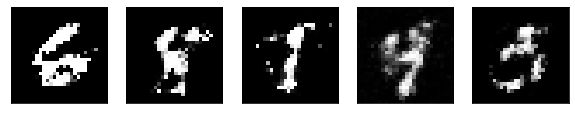

ÉPOCA 065 finalizada: custo discriminador 1.243830 - custo gerador 1.131312      


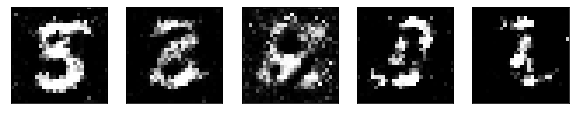

ÉPOCA 066 finalizada: custo discriminador 1.240796 - custo gerador 1.135020      


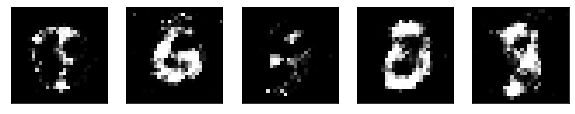

ÉPOCA 067 finalizada: custo discriminador 1.225604 - custo gerador 1.189842      


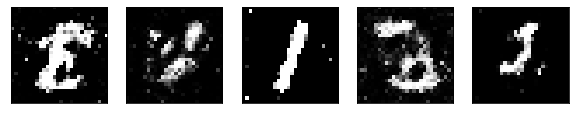

ÉPOCA 068 finalizada: custo discriminador 1.240243 - custo gerador 1.173568      


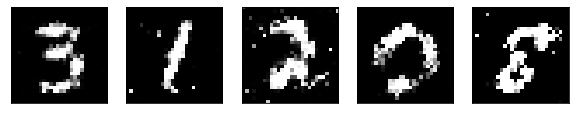

ÉPOCA 069 finalizada: custo discriminador 1.241455 - custo gerador 1.150345      


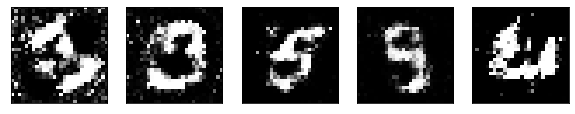

ÉPOCA 070 finalizada: custo discriminador 1.241838 - custo gerador 1.141865      


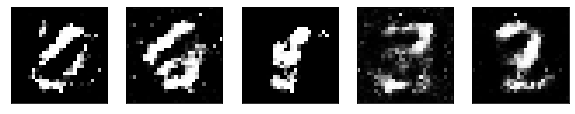

ÉPOCA 071 finalizada: custo discriminador 1.236963 - custo gerador 1.142749      


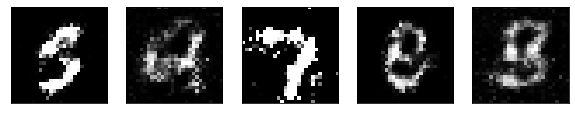

ÉPOCA 072 finalizada: custo discriminador 1.244613 - custo gerador 1.129741      


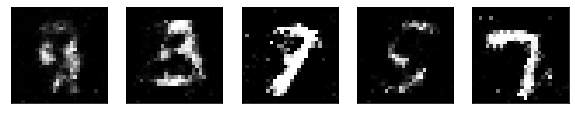

ÉPOCA 073 finalizada: custo discriminador 1.253303 - custo gerador 1.107483      


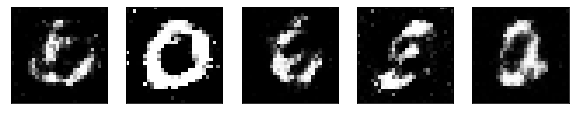

ÉPOCA 074 finalizada: custo discriminador 1.264812 - custo gerador 1.067624      


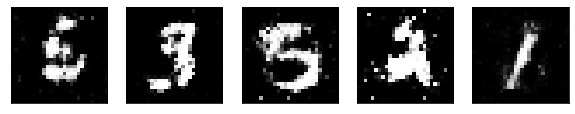

ÉPOCA 075 finalizada: custo discriminador 1.262931 - custo gerador 1.078368      


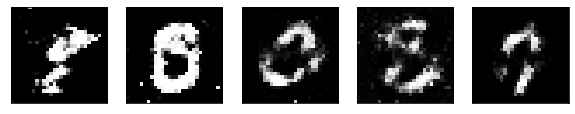

ÉPOCA 076 finalizada: custo discriminador 1.260583 - custo gerador 1.081554      


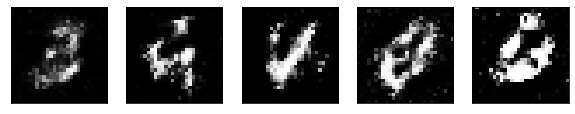

ÉPOCA 077 finalizada: custo discriminador 1.264181 - custo gerador 1.062046      


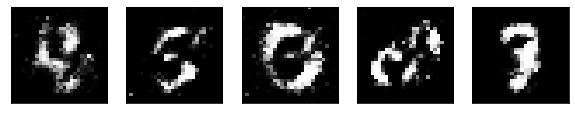

ÉPOCA 078 finalizada: custo discriminador 1.267847 - custo gerador 1.042672      


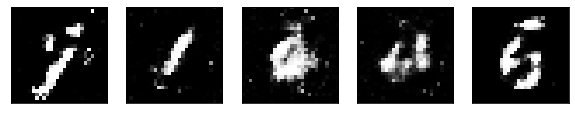

ÉPOCA 079 finalizada: custo discriminador 1.261548 - custo gerador 1.084661      


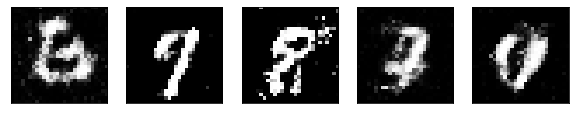

ÉPOCA 080 finalizada: custo discriminador 1.270096 - custo gerador 1.078353      


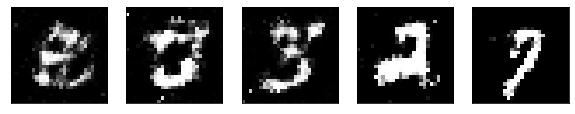

ÉPOCA 081 finalizada: custo discriminador 1.269411 - custo gerador 1.060666      


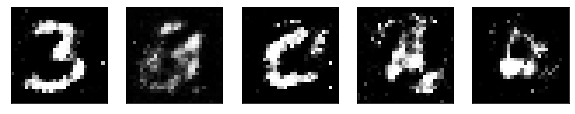

ÉPOCA 082 finalizada: custo discriminador 1.276519 - custo gerador 1.068178      


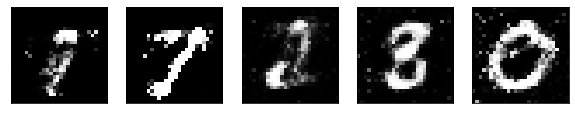

ÉPOCA 083 finalizada: custo discriminador 1.262890 - custo gerador 1.080356      


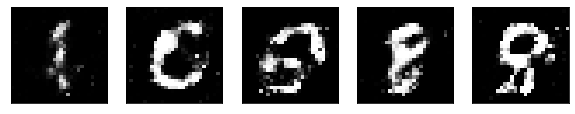

ÉPOCA 084 finalizada: custo discriminador 1.270757 - custo gerador 1.044891      


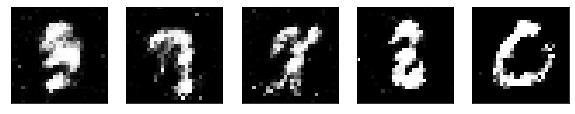

ÉPOCA 085 finalizada: custo discriminador 1.270727 - custo gerador 1.075062      


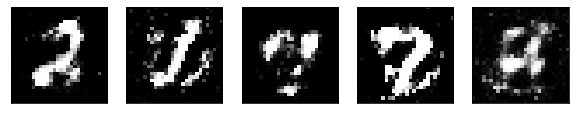

ÉPOCA 086 finalizada: custo discriminador 1.266971 - custo gerador 1.103347      


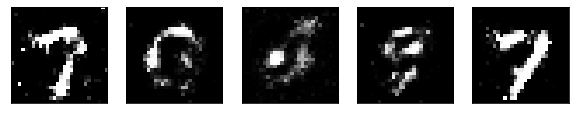

ÉPOCA 087 finalizada: custo discriminador 1.238429 - custo gerador 1.202925      


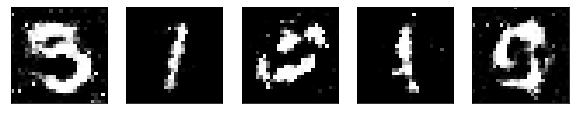

ÉPOCA 088 finalizada: custo discriminador 1.242481 - custo gerador 1.164705      


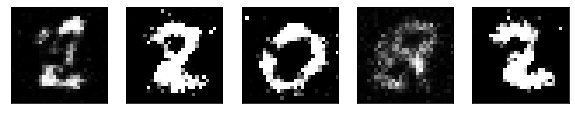

ÉPOCA 089 finalizada: custo discriminador 1.236754 - custo gerador 1.165546      


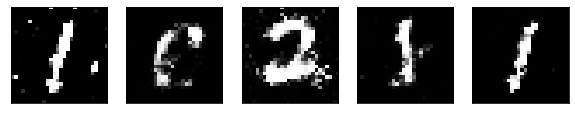

ÉPOCA 090 finalizada: custo discriminador 1.256714 - custo gerador 1.120180      


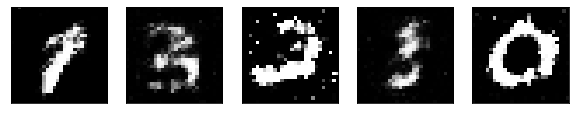

ÉPOCA 091 finalizada: custo discriminador 1.242074 - custo gerador 1.155286      


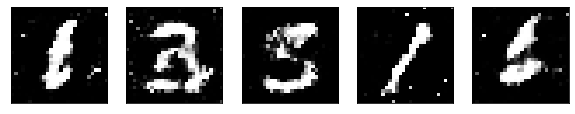

ÉPOCA 092 finalizada: custo discriminador 1.243244 - custo gerador 1.135770      


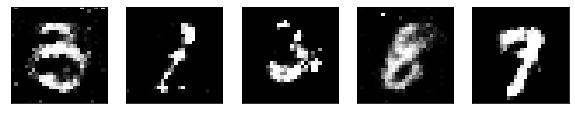

ÉPOCA 093 finalizada: custo discriminador 1.237509 - custo gerador 1.150942      


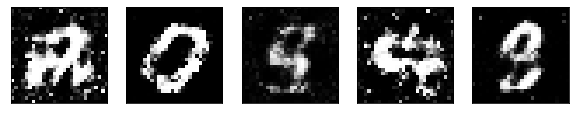

ÉPOCA 094 finalizada: custo discriminador 1.257034 - custo gerador 1.088635      


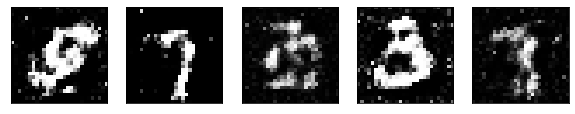

ÉPOCA 095 finalizada: custo discriminador 1.257823 - custo gerador 1.090257      


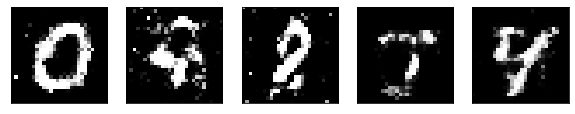

ÉPOCA 096 finalizada: custo discriminador 1.255076 - custo gerador 1.101756      


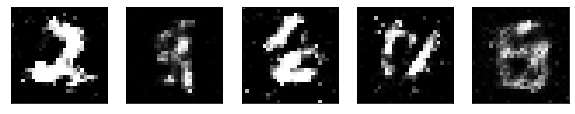

ÉPOCA 097 finalizada: custo discriminador 1.265896 - custo gerador 1.084235      


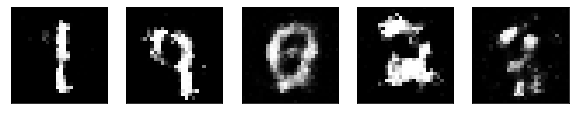

ÉPOCA 098 finalizada: custo discriminador 1.267791 - custo gerador 1.061196      


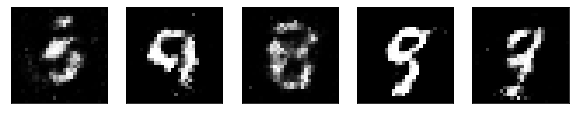

ÉPOCA 099 finalizada: custo discriminador 1.269942 - custo gerador 1.076501      


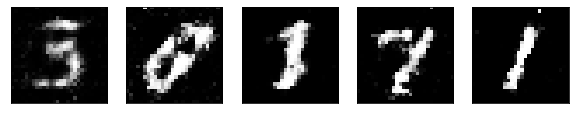

ÉPOCA 100 finalizada: custo discriminador 1.268612 - custo gerador 1.042398      


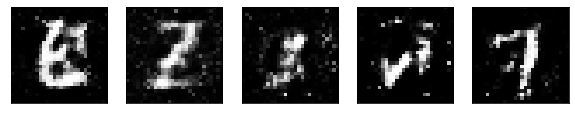

In [12]:
for epoch in range(100):
    D_running_loss = 0
    G_running_loss = 0
    
    for i, (imagens_reais, _) in enumerate(train_loader):
        batch_size = imagens_reais.size(0)
        imagens_reais = imagens_reais * 2 - 1
        imagens_reais = imagens_reais.to(device)

        # Treinamento do gerador
        G_optimizer.zero_grad()
        ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        outputs_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.ones(batch_size).to(device)
        G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)
        G_loss.backward()
        G_optimizer.step()

        # Treinamento do discriminador
        D_optimizer.zero_grad()
        outputs_reais = D.forward(imagens_reais)
        labels_reais = (torch.ones(batch_size) * 0.9).to(device)
        D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

        ruido = np.random.uniform(-1., 1., (batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        outputs_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.zeros(batch_size).to(device)
        D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

        D_loss = D_loss_reais + D_loss_falsas
        D_loss.backward()
        D_optimizer.step()

        D_running_loss += D_loss.item()
        G_running_loss += G_loss.item()

        # Imprimindo os dados referentes a esse batch   
        print('\rÉpoca {:03d} - Loop {:3d} de {:3d}: custo discriminador {:03.5f} - custo gerador {:03.5f}'.format(epoch + 1, i + 1, len(train_loader), D_loss.item(), G_loss.item()), end = '\r')
  
    # Imprimindo os dados referentes a essa época
    D_running_loss /= len(train_loader)
    G_running_loss /= len(train_loader)
    print('ÉPOCA {:03d} finalizada: custo discriminador {:03.6f} - custo gerador {:03.6f}      '.format(epoch + 1, D_running_loss, G_running_loss))

    fig, ax = plt.subplots(1, 5, figsize=(10,5))
    for i in range(5):
      ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
      ax[i].xaxis.set_visible(False)
      ax[i].yaxis.set_visible(False)
    plt.show()


## Etapa 7: Criação de novas imagens

In [13]:
ruido = np.random.uniform(-1., 1., (20, 100))

In [14]:
ruido[1]

array([ 0.58890228,  0.65025983, -0.96732927, -0.93611023,  0.9159708 ,
        0.05089488,  0.83030497, -0.39718787,  0.46651227, -0.31354878,
       -0.15481274,  0.36713103,  0.61271253,  0.46396872,  0.11947696,
        0.29984143, -0.51925679, -0.46661815, -0.87153023,  0.09590504,
        0.18448711,  0.66244244,  0.69959337,  0.02519167, -0.67237325,
       -0.36589353,  0.90863717,  0.80557207, -0.29437025,  0.90529463,
       -0.92860373,  0.60410271,  0.90325158,  0.03353027, -0.4223386 ,
       -0.07643151, -0.07017279, -0.56687518,  0.22918371, -0.52614672,
        0.29786502,  0.93797541, -0.785232  ,  0.86713289, -0.90206561,
       -0.11844345,  0.30436488, -0.49484015, -0.98772099, -0.35319072,
       -0.77263345, -0.26325696, -0.03528438, -0.93276404,  0.76341086,
       -0.95467872, -0.63090581,  0.21303228,  0.35190854,  0.66585327,
       -0.97242953, -0.36763531, -0.56202439, -0.55247554,  0.43971195,
        0.96682863, -0.08982719,  0.61728452, -0.11774998, -0.46

In [15]:
ruido = torch.from_numpy(ruido).float().to(device)

In [16]:
type(ruido)

torch.Tensor

In [17]:
G.eval()
previsao = G.forward(ruido)

In [18]:
previsao = previsao.cpu().detach().numpy()

In [19]:
previsao.shape[0]

20

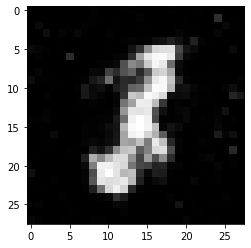

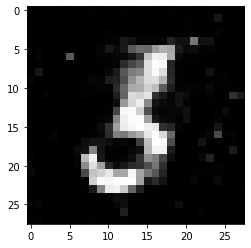

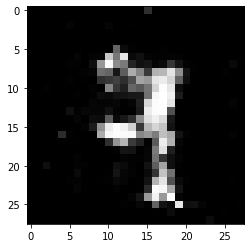

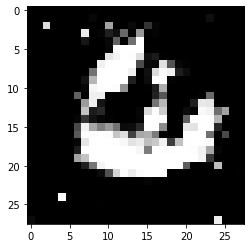

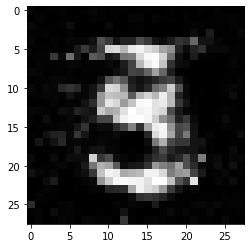

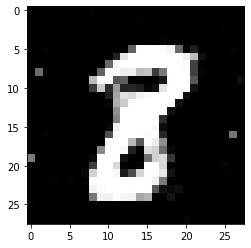

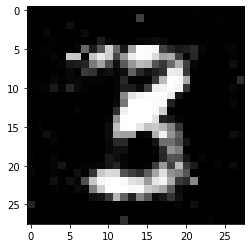

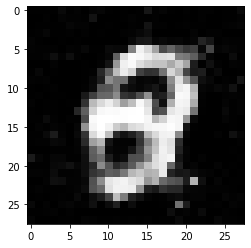

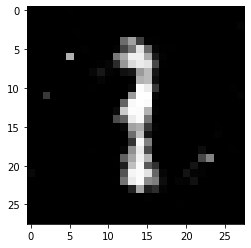

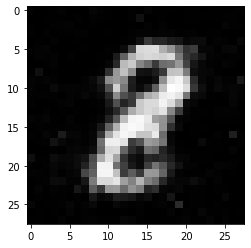

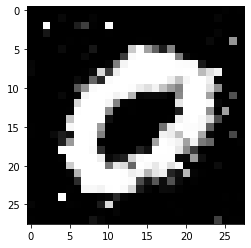

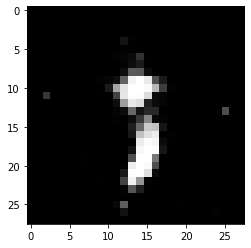

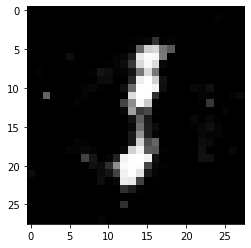

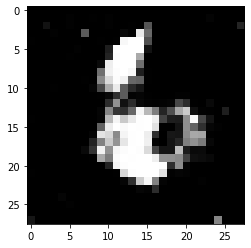

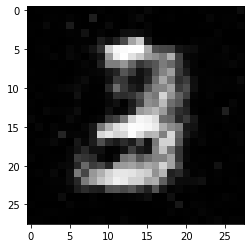

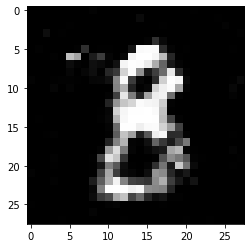

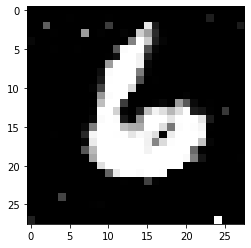

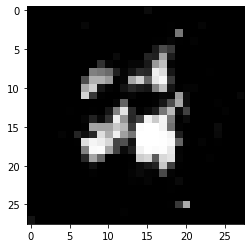

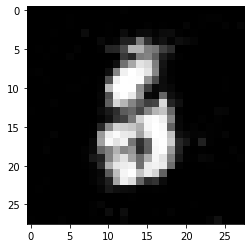

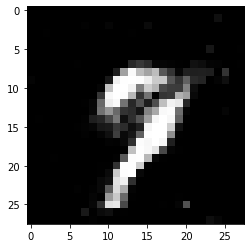

In [20]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :].squeeze(), cmap='gray')
  plt.show()